# Assignment #5: Image GANs for Generating Dogs
Here you will be using a generative adversarial network trained on [ImageNet](http://www.image-net.org/). Although there are many of non-dog classes in ImageNet, we will be focusing our experiments on dog photos. A high quality GAN is tricky to design well and takes dozens of hours or days to train, so to save ourselves computation time, we are using a pre-trained GAN with [TensorFlow](https://www.tensorflow.org/).

# Part 1: Setup
Your goal for this setup part is simply to successfully run all the code below.

### Environment Setup

This code uses TensorFlow version 1.15 and Python 3.

In [2]:
from io import BytesIO
import IPython.display
import numpy as np
import urllib
import sys
# Pillow is the friendly PIL fork. PIL is the Python Imaging Library, 
# adds image processing capabilities to your Python interpreter.
# import using conda install -c anaconda pillow 
import PIL
from PIL import Image
from scipy.stats import truncnorm
from skimage import io, data, transform # pip install scikit-image
import requests
import tensorflow as tf # pip install tensorflow==1.15
from tensorflow.python.framework import ops
import tensorflow_hub as hub #pip install "tensorflow_hub>=0.6.0"
import scipy.misc
from tqdm import tqdm
import random
import cv2 # pip install opencv-python

### BigGAN Model Setup

For this exercise, we will use a pre-trained model called _BigGAN_ generator available on [TensorFlow Hub](https://tfhub.dev/deepmind/biggan-128/2). For more information about this model, check out the authors paper [_"Large Scale GAN Training for High Fidelity Natural Image Synthesis"_ Brock et al. 2019](https://arxiv.org/abs/1809.11096). Next is the address to download this model from TensorFlow Hub:

In [3]:
# this model will output 128 by 128 pixel images.
module_path ='https://tfhub.dev/deepmind/biggan-128/2'  
print(module_path)

https://tfhub.dev/deepmind/biggan-128/2


### Helper Code Setup

This code, in `helper.py` is adapted from the [BigGANs Tutorial](https://colab.research.google.com/drive/1rqDwIddy0eunhhV8yrznG4SNiB5XWFJJ) from [Machine Learning for Artists](https://ml4a.github.io/) by Gene Kogan. Many of the exercises here are inspired from that tutorial, so check it out if you want to have more fun with GANs later!

In [5]:
from helpers import GANSession
# you can safely ignore the tensorflow WARNING outputs
gan = GANSession(module_path)

Loading BigGAN module from: https://tfhub.dev/deepmind/biggan-128/2
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore




Inputs:
   y: Tensor("y:0", shape=(?, 1000), dtype=float32)
  z: Tensor("z:0", shape=(?, 120), dtype=float32)
  truncation: Tensor("truncation:0", shape=(), dtype=float32)


Output: Tensor("module_apply_default/G_trunc_output:0", shape=(?, 128, 128, 3), dtype=float32)


## Part 2: Experimenting with generating deep fake puppies

**Task 2.A (5pt)** Choose a dog breed from `dog_classes.txt`, replacing the Corgi below.

In [ ]:
truncation = random.uniform(0.02,1) # min:0.02, max:1
noise_seed = random.randint(0,100) # min:0, max:100
category = "207: 'golden retriever'" # put dog breed here

num_samples = 1
z = gan.truncated_z_sample(num_samples, truncation, noise_seed)
y = int(category.split(':')[0])

print('truncation: ',truncation, 'noise seed:',noise_seed)


ims = gan.sample(z, y, truncation=truncation) # ims is a numpy array
max_columns = 20
gan.imshow(gan.imgrid(ims, cols=min(num_samples, max_columns)))

  0%|          | 0/1 [00:00<?, ?it/s]

truncation:  0.08844376758491942 noise seed: 93


**Task 2.B (5pt)** Run the above generator a few times. Below, paste in your best looking result as well as the `truncation` and `noise seed` parameter values for that result. Next past in your worst looking dog as well as its parameter values. Describe what you are seeing: what kinds of visual errors do you think this model is creating? _hint: if you copy a screenshot to clipboard, you can paste it directly into this markdown cell_

**Answer:** <br>
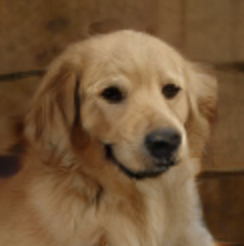<br>
truncation:  0.6905977205221188 noise seed: 16

**Task 2.C (8pt)** Take the code from 2.A above and copy that cell below for task 2.C. Now adapt this code so that it generates a row of 11 dog images, where each dog has a different value of the parameter `noise_seed` evenly distributed across the range 0 to 100 inclusive.

_For a Welsh Pembroke Corgi with a fixed `truncation` value of `0.95` this looks like:_
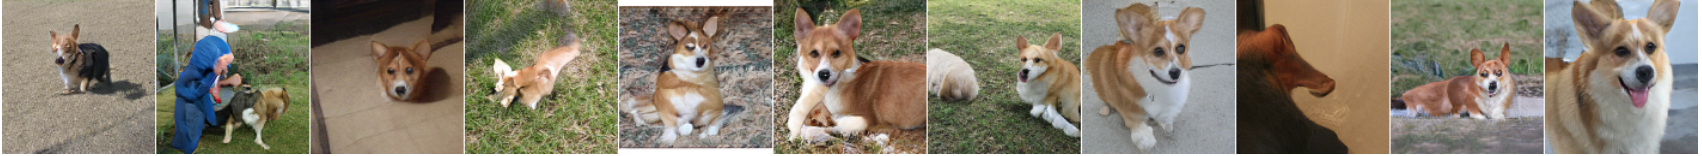
_where the leftmost Corgi has a `noise_seed` of `0` and the rightmost has a `noise_seed` of 100_

In [ ]:
## Task 2.C

**Task 2.D (12pt)** Take the code from 2.C above and copy that below. Now, your target output is a _grid_ of dogs. Just as before in 2.C, each _column_ will be 11 generated dogs in an ordered range by `noise_seed` 0-100. Now the _rows_ of the grid shall be different values of the `truncation` parameter, in an ordered range from 0.02-1.0. Your finished grid should have 10 rows, 11 columns, where the top left dog in the grid has a `noise_seed = 0` and `truncation = 0.02` and the values of those parameters increase top to bottom left to right. The dog at the bottom right will have a `noise_seed = 100` and `truncation = 1.0`.

In [ ]:
## Task 2.D

**Task 2.E (11pt)** Given your experimentations above and your grid of dogs, hypothesize:
 - What might be the relationship between `noise_seed` and what a generated dog looks like?
 - What might be the relationship between `truncation` and what a generated dog looks like?

**Answer:**

# Part 3: Experimenting with transforming puppies

In this section, we will experiment with different forms of interpolation to transform and combine different dog images.

**Task 3.A (8pt)** Modify and run the code below, putting in your favorite `truncation` and `noise_seed` values from your experiments in Part 2. Run the code with a pair of closely similair breeds (like the Pembroke and the Cardigan Welsh corgies shown below) and a pair of very different breeds. 
 - What do you hypothesize this code is doing with the two dog image samples?
 - Hypothesize: Does the performance (visual quality of the output) differ based on qualities of the source images such as similar dog breed or similar image background?
 
**Answer:**

In [ ]:
num_interps = 10 #min:2, max:1000
truncation = 0.46 #min:0.02, max:1
noise_seed_A = 2 #min:0, max:100
category_A = "263: 'Pembroke, Pembroke Welsh corgi'" 
noise_seed_B = 99 #min:0, max:100
category_B = "264: 'Cardigan, Cardigan Welsh corgi'" 

y_interp, z_interp = gan.get_interpolated_yz([int(category_A.split(':')[0]), int(category_B.split(':')[0])], num_interps, noise_seed_A, noise_seed_B, truncation=truncation)
imgs = gan.sample(z_interp, y_interp, truncation=truncation)
gan.imshow(gan.imgrid(imgs, cols=num_interps))

The code below does a different, but similar operation to the code in Task 3.A.

**Task 3.B (8pt)** Modify and run the code below, putting in your favorite `truncation` and `noise_seed` values from your experiments in Part 2. Run the code with a pair of closely similair breeds (like the Pembroke and the Cardigan Welsh corgies shown below) and a pair of very different breeds. 
 - What do you hypothesize this code is doing with the two dog image samples?
 - Hypothesize: Does the performance (visual quality of the output) differ based on qualities of the source images such as similar dog breed or similar image background?
 - Unlike in Task 3.A, both images share the same `noise_seed`. From your observations, what do you think is the effect of having the images share the same parameter value versus having each their own `noise_seed`?
 
**Answer:**

In [ ]:
truncation = 0.45 #min:0.02, max:1
noise_seed = 22 #min:0, max:100
categoryA = "266: 'miniature poodle'" 
categoryB = "153: 'Maltese dog, Maltese terrier, Maltese'"  

categories = [int(categoryA.split(':')[0]), int(categoryB.split(':')[0])]
y, z = gan.get_combination_yz(categories, noise_seed, truncation)
imgs = gan.sample(z, y, truncation=truncation)
gan.imshow(gan.imgrid(imgs, cols=len(categories)+1))

**Task 3.C (5pt)** Paste in below your best looking result from 3.B. Include a description of all parameters you used to generate the image.

**Answer:**

**Task 3.D (5pt)** A big advantage of the BigGAN model over other GANs is that it is able to produce much higher resolution images than GANs were previously capable of. To test this out, go up to the Model Setup section, and replace the module path with ['https://tfhub.dev/deepmind/biggan-512/2']('https://tfhub.dev/deepmind/biggan-512/2'). Then re-run just the Setup section of this notebook. This will load a version of BigGAN that can generate 512 by 512 pixel images instead of 128 by 128 pixels.

Now re-run the code for Task 3.B, and paste in below your best looking result, including a description of all parameters. _note: since this generates a larger image, it will take longer to compute_

**Answer:**

**Task 3.E (8pt)** Compare your best results from Task 3.C and 3.D. Hypothesize, what do you think the effect of a higher resolution GAN is on the image quality?

**Answer:**